In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 

In [ ]:
vcf Chr1:9001000..9002000

In [ ]:
8999999

In [80]:
import pysam

# Open FASTA and VCF files
fasta_file = pysam.FastaFile("referencevcf3.fasta")
vcf_file = pysam.VariantFile("test.vcf")

# Count number of positions in FASTA and VCF files
num_positions_fasta = sum([len(fasta_file[contig]) for contig in fasta_file.references])
num_positions_vcf = sum([1 for record in vcf_file])

print(num_positions_fasta)
print(num_positions_vcf)

8001

8001

In [54]:
import pysam

# Open the VCF and FASTA files
vcf_file = pysam.VariantFile("test.vcf")
fasta_file = pysam.FastaFile("test.fasta")

In [55]:
print(list((vcf_file.header.contigs)))

['1', '2', '3', '4', '5']


In [56]:
8999999

8999999

In [83]:
fasta_file.references

['Chr1:9001000-9009000']

In [58]:
fasta_file.lengths

[8000]

In [41]:


# Check if the chromosome names and lengths are the same in both files
if vcf_file.references != fasta_file.references:
    print("Error: chromosome names in VCF file do not match chromosome names in FASTA file")
    exit()
if vcf_file.header.contigs != fasta_file.lengths:
    print("Error: chromosome lengths in VCF file do not match chromosome lengths in FASTA file")
    exit()

# Get the genomic coordinates for chromosome 1
chromosome_name = "Chr1"
chromosome_length = fasta_file.get_reference_length(chromosome_name)
vcf_positions = set()
for record in vcf_file.fetch(chromosome_name, 0, chromosome_length):
    vcf_positions.add(record.pos)
fasta_positions = set(range(0, chromosome_length))

# Check if the VCF and FASTA files cover the same positions for chromosome 1
if vcf_positions != fasta_positions:
    print("Error: VCF and FASTA files do not cover the same positions for chromosome 1")
    exit()

print("VCF and FASTA files cover the same positions for chromosome 1")


AttributeError: 'pysam.libcbcf.VariantFile' object has no attribute 'references'

In [37]:
fasta_file.references  # 9.001.000

['Chr1:9002000-9006000']

In [38]:
num_positions_fasta

4000

In [39]:
num_positions_vcf

6001

In [ ]:
9001000 10001001


In [29]:
num_positions_fasta

1000001

In [48]:
positions = []

In [83]:
for rec in vcf_file.fetch():
    positions.append(rec.pos)

In [51]:
9.000.999 in positions

False

In [ ]:
9 001 000 

In [69]:
9001000 in positions

True

In [81]:
pos_series

0           9001000
1           9001001
2           9001002
3           9001003
4           9001004
             ...   
999996     10000996
999997     10000997
999998     10000998
999999     10000999
1000000    10001000
Length: 1000001, dtype: int64

In [80]:
pos_series[pos_series.isin([9001000, 9001001,9001005])]

0    9001000
1    9001001
5    9001005
dtype: int64

In [75]:
positions.filter(9001000)

AttributeError: 'list' object has no attribute 'filter'

In [ ]:
first: 9001000  last 10001000

In [62]:
len(positions)

1000001

In [76]:
pos_series = pd.Series(positions)

In [61]:
pd.Series(positions).max()

10001000

In [33]:
num_positions_vcf

1000001

In [82]:
for record in vcf_file:
    print(record)

In [43]:
[record for record in vcf_file]

[]

In [6]:
import fwdpy11 as fp
import pyslim

In [ ]:
http://localhost:8888/?token=adf48011db5035700d1434bb9906f59a473c540ee46f054a

In [19]:
ts

In [18]:
import tskit, pyslim 
import numpy as np 
ts = tskit.load("recipe_nucleotides.trees") 
M = [[0 for _ in pyslim.NUCLEOTIDES] for _ in pyslim.NUCLEOTIDES] 
for mut in ts.mutations(): 
    mut_list = mut.metadata["mutation_list"] 
    k = np.argmax([u["slim_time"] for u in mut_list]) 
    derived_nuc = mut_list[k]["nucleotide"] 
    if mut.parent == -1: 
        acgt = ts.reference_sequence.data[int(ts.site(mut.site).position)]          
        parent_nuc = pyslim.NUCLEOTIDES.index(acgt) 
    else: 
        parent_mut = ts.mutation(mut.parent) 
        assert(parent_mut.site == mut.site) 
        parent_nuc = parent_mut.metadata["mutation_list"][0]["nucleotide"]      
    M[parent_nuc][derived_nuc] += 1
print("{}\t{}\t{}".format('ancestral', 'derived', 'count')) 
for j, a in enumerate(pyslim.NUCLEOTIDES): 
    for k, b in enumerate(pyslim.NUCLEOTIDES): 
        print("{}\t{}\t{}".format(a, b, M[j][k]))

ancestral	derived	count
A	A	0
A	C	603
A	G	632
A	T	587
C	A	638
C	C	0
C	G	653
C	T	623
G	A	621
G	C	631
G	G	0
G	T	662
T	A	635
T	C	656
T	G	635
T	T	0


In [4]:
# Define the mutation rates, effective population size, and length of the genome
mu = 1.2e-8
theta = 4*mu*1e4
Ne = 1e4
L = 10000

# Set the file path
vcf_file = "col0.vcf"

# Load the variants from the VCF file
with fp.VariantFile(vcf_file) as f:
    for variant in f:
        print(variant.position)


AttributeError: module 'fwdpy11' has no attribute 'VariantFile'

In [5]:
import fwdpy11 as fp
from fwdpy11 import vcfio

# Set simulation parameters
N = 10000
L = 10000

# Load the variants from the VCF file
vcf_file = vcfio.VariantFile("col0.vcf")
variants = list(vcf_file)

ImportError: cannot import name 'vcfio' from 'fwdpy11' (/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/fwdpy11/__init__.py)

In [ ]:

# Define the mutation model using the variants
mutation_model = fp.ExpS(1.0/L, 1.0/L, 0.0)

# Define the population size
pop = fp.SlocusPop(Ne, mutation_model, 2*L)

# Initialize the population with variants from the VCF file
fp.initialize_from_vcf(pop, variants, L)

# Define the simulation parameters
rng = fp.GSLrng(101)
Ngen = 100
s = 0.1
replicate = 1

# Run the simulation
for gen in range(Ngen):
    pop.evolve(rng, Ne, s)
    if gen % 10 == 0:
        print("Generation", gen)

# Print some statistics
print("Final number of variants:", pop.generation_stats["n"])
print("Final mean heterozygosity:", pop.generation_stats["h"])


In [2]:
## testing the api from 1001 genome project
import requests
url = 'https://tools.1001genomes.org/api/v1/vcfsubset/strains/9998,9999/gids/AT1G01070.1,AT1G01070.2/type/fullgenome/format/vcf'


In [3]:
req = requests.get(url)

In [4]:
req

<Response [200]>

In [6]:
req.headers

{'Date': 'Wed, 08 Mar 2023 18:00:36 GMT', 'Server': 'Apache/2.4.29 (Ubuntu)', 'Access-Control-Allow-Origin': '*', 'Content-Disposition': 'attachment; filename="9998,9999_1:38752-40944,1:38752-40927_fullgenome.vcf"', 'Strict-Transport-Security': 'max-age=15552000; includeSubdomains;', 'Vary': 'User-Agent', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/x-vcard; charset=utf-8'}

In [7]:
open('test.txt', 'wb').write(req.content)

278139

In [106]:
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv')

In [107]:
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']

In [73]:
##find the ecotypes used in grenenet 
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv') #['ecotypeid']
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']['ecotypeid']
#/Users/tbellagio/safedata/ath_evo/grenephase1/data

In [109]:
ecotypes_grenenet

,ecotypeid,source,longitude,latitude,csnumber,name,country,weightmasterseed,estimatedseednumber,seedsperplot
0,159,1001G,3.93333,47.3500,CS77070,MAR2-3,France,0.3004,16638,17.331250
1,265,1001G,-1.16667,44.6500,CS77198,PYL-6,France,0.3250,18000,18.750000
2,763,1001G,74.36670,42.3000,CS76522,Kar-1,Kyrgyzstan,0.1827,10119,10.540625
3,765,1001G,73.40000,42.1833,CS76607,Sus-1,Kyrgyzstan,0.2994,16582,17.272917
4,766,1001G,73.63330,42.5833,CS76473,Dja-1,Kyrgyzstan,0.3004,16638,17.331250
...,...,...,...,...,...,...,...,...,...,...
224,10002,1001G,9.04000,48.5300,CS76405,TueWa1-2,Germany,0.2338,12949,13.488542
225,10006,1001G,34.38140,44.6419,CS76395,Kastel-1,Ukraine,0.3075,17031,17.740625
226,10011,1001G,45.36220,39.8692,CS76394,Yeg-1,Armenia,0.0489,2708,2.820833
227,10013,1001G,48.61310,38.7406,CS76388,Lerik1-3,Azerbaijan,0.1704,9438,9.831250


In [110]:
ecotypes_grenenet = ecotypes_grenenet['ecotypeid'].tolist()

In [113]:
with open('ecotypes_grenenet.txt', 'w') as file:
    file.write('\n'.join(str(ecotypes) for ecotypes in ecotypes_grenenet))
    

In [50]:
ecotypes = str(lines).replace('[\'', '').replace('\']', '').replace(' ', '')


In [55]:
type(ecotypes)

str

In [57]:
ecotypes.replace(' ', '')

'159,265,763,765,766,768,772,5151,5165,5768,5772,5784,5811,6013,6025,6040,6073,6074,6108,6150,6177,6180,6184,6188,6195,6209,6216,6243,6244,6898,6911,6915,6929,6932,6938,6939,6940,6945,6958,6961,6963,6979,6987,7000,7002,7003,7008,7013,7025,7028,7031,7036,7062,7063,7067,7071,7077,7092,7103,7106,7125,7126,7127,7143,7164,7165,7186,7203,7209,7217,7218,7244,7255,7268,7273,7276,7282,7287,7288,7296,7298,7316,7323,7333,7346,7347,7353,7372,7378,7384,7394,7404,7411,7521,8214,8230,8231,8240,8247,8249,8311,8312,8351,8354,8357,8376,8387,9057,9058,9323,9371,9394,9416,9427,9470,9481,9506,9507,9510,9512,9517,9518,9521,9522,9523,9524,9526,9527,9528,9529,9534,9535,9537,9539,9542,9544,9547,9548,9549,9555,9557,9559,9560,9562,9564,9565,9574,9577,9579,9584,9586,9587,9591,9594,9595,9596,9597,9598,9600,9602,9606,9612,9619,9625,9629,9632,9634,9637,9640,9643,9649,9653,9657,9659,9697,9698,9699,9713,9716,9719,9723,9726,9736,9737,9739,9741,9743,9748,9749,9758,9759,9761,9764,9766,9769,9774,9775,9779,9781,9782,9784,9

In [90]:
len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))

/var/folders/c7/0sb823gx22x79fkn0_lcmmqw0000gn/T/ipykernel_97014/1215055019.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))


1134

In [3]:
import pandas as pd

In [5]:
pd.read_csv('/Users/tbellagio/Documents/grenephase1/scratch_tati/simulations/moi_slim/BC_Map_environments.14x14.txt', header=None)

,0
0,-7
1,-4
2,1
3,-2
4,1
...,...
191,2
192,4
193,7
194,7


In [1]:
!pwd

/Users/tbellagio/Documents/grenephase1/scratch_tati/simulations


In [6]:
14 * 14

196

In [ ]:
fitnessScaling = 1.5 - (phenotypes - 10.0)^2 * 0.005; 

In [ ]:
fitnessScaling = 1.5 - (phenotypes - 10.0)^2 * 0.005; 

In [ ]:
fitnessEffect() { 
 phenotype = sum(individual.genomes.countOfMutationsOfType(m2)); 
 //print(individual.genomes.countOfMutationsOfType(m2));
 //print('hola');
 //print(phenotype);
 //print(1.5 - (phenotype - 10.0)^2 * 0.005);
 return 1.5 - (phenotype - 10.0)^2 * 0.005; b

In [7]:
sqrt(196)

NameError: name 'sqrt' is not defined

In [9]:
14 * 14


196

In [10]:
4 * 4


16

In [ ]:
1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 

In [12]:
1.5 - ((0 - 2)**2) * 0.005

1.48

In [14]:
phenotypes = 0
indssubpopulationtag = -7

In [17]:
1.5 - (phenotypes - indssubpopulationtag)**2 * 0.005

1.255

In [105]:
mu, sigma = 0.1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [106]:
phenotype = sum(s)

In [107]:
phenotype

6.2749877549440045

In [108]:
np.exp(-0.5 * (phenotype - 3)**2)

0.0046878913765051105

21.264550984034315

<AxesSubplot:ylabel='Count'>

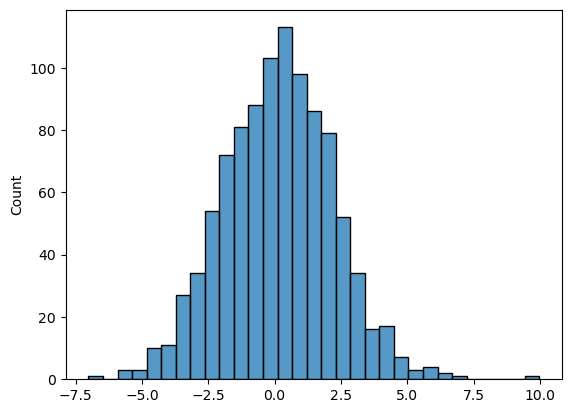

In [84]:
sns.histplot(s)

In [38]:
mu, sigma = 1, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 16)

<AxesSubplot:ylabel='Count'>

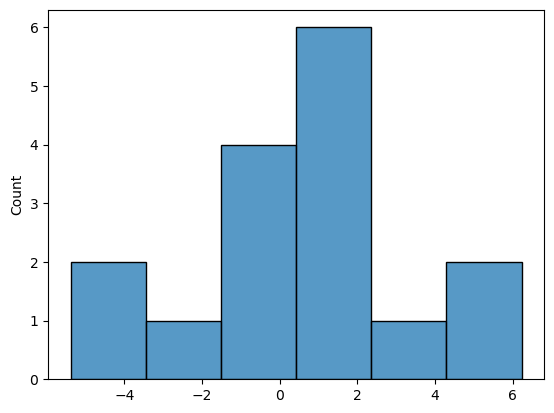

In [39]:
sns.histplot(s)

In [ ]:
## phenotypes will be the sum of random mutations taken from a normal with mu, sigma = 0.1, 0.01
mu, sigma = 0.1, 0.01 # mean and standard deviation
s = np.random.normal(mu, sigma, )

In [45]:
# uniform mutation rate of  1e-7 (per base position per gamete) across the whole chromosome.
#initializeMutationRate(1e-8) probabilidad de mutation de una base por gameta por cromosoma

#Number of mutations = Mutation rate × Length of DNA sequence × Time period

1e-8 * 1000000 * 23



0.23

In [46]:
qtls = '0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 3.35447e-26 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.14615e-13 0.0 1.4013e-45 0.0 0.0 3.35447e-26 0.0 0.0 0.0 0.00179957 4.38608e-30 0.0 0.00179957 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 2.14615e-13 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.65165e-09 1.4013e-45 3.35447e-26 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00179957 0.0 0.0 0.0 0.0 1.4013e-45 0.00179957 0.0 0.0 0.0 0.0 4.38608e-30 0.0 0.0 0.0'

In [47]:
qtls = qtls.replace(' ', ',')

'0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,1.4013e-45,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.00179957,4.38608e-30,0.0,0.00179957,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.65165e-09,1.4013e-45,3.35447e-26,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,1.4013e-45,0.00179957,0.0,0.0,0.0,0.0,4.38608e-30,0.0,0.0,0.0'

In [61]:
## phenotypes are basically the sum of different effect sizes 

phenotypes = np.array([0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,1.4013e-45,0.0,0.0,3.35447e-26,0.0,0.0,0.0,0.00179957,4.38608e-30,0.0,0.00179957,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,2.14615e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.65165e-09,1.4013e-45,3.35447e-26,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179957,0.0,0.0,0.0,0.0,1.4013e-45,0.00179957,0.0,0.0,0.0,0.0,4.38608e-30,0.0,0.0,0.0])

In [ ]:
Fitness = exp(-0.5 * (phenotype - optimum)^2 / sigma^2)
Fitness = exp(-0.5 * (phenotype - optimum)^2)

## what i was using 
inds.fitnessScaling = 1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 


In [ ]:
inds.fitnessScaling = 1.5 - (phenotypes - inds.subpopulation.tag)^2 * 0.005; 


In [66]:
fitness = np.exp(-0.5 * (phenotypes - 2) ** 2)


In [67]:
fitness

array([0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13582303,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13582303,
       0.13533528, 0.13533528, 0.13582303, 0.13582303, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533529, 0.13533528,
       0.13533528, 0.13582303, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
       0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533

In [ ]:
def calculate_fitness(phenotype, optimum, sigma):
    exponent = 
    fitness = 
    return fitness

In [79]:


#define x-axis values
x = np.linspace (0, 40, 100) 

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=5, scale=3)


In [81]:
x

array([ 0.        ,  0.4040404 ,  0.80808081,  1.21212121,  1.61616162,
        2.02020202,  2.42424242,  2.82828283,  3.23232323,  3.63636364,
        4.04040404,  4.44444444,  4.84848485,  5.25252525,  5.65656566,
        6.06060606,  6.46464646,  6.86868687,  7.27272727,  7.67676768,
        8.08080808,  8.48484848,  8.88888889,  9.29292929,  9.6969697 ,
       10.1010101 , 10.50505051, 10.90909091, 11.31313131, 11.71717172,
       12.12121212, 12.52525253, 12.92929293, 13.33333333, 13.73737374,
       14.14141414, 14.54545455, 14.94949495, 15.35353535, 15.75757576,
       16.16161616, 16.56565657, 16.96969697, 17.37373737, 17.77777778,
       18.18181818, 18.58585859, 18.98989899, 19.39393939, 19.7979798 ,
       20.2020202 , 20.60606061, 21.01010101, 21.41414141, 21.81818182,
       22.22222222, 22.62626263, 23.03030303, 23.43434343, 23.83838384,
       24.24242424, 24.64646465, 25.05050505, 25.45454545, 25.85858586,
       26.26262626, 26.66666667, 27.07070707, 27.47474747, 27.87

/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


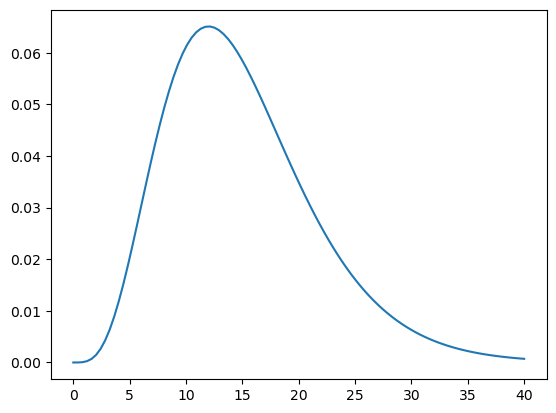

In [80]:
sns.lineplot(x,y);

In [111]:
1969055 * 0.001

1969.055

In [113]:
19681/4

4920.25

In [114]:
4920 + 4920

9840

In [115]:
9840 + 4920

14760